### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-19,433589,4403619,625207,572641,251305,131691,128634,170716,113376,91963,83004,123901,100255,4848,197716
2021-08-20,433964,4415252,627843,573511,252080,131805,128683,171480,113472,91980,83136,124023,100810,4848,197752
2021-08-21,434367,4423976,628303,574209,252927,131909,128728,172257,113472,91983,83136,124121,101354,4848,197818
2021-08-22,434756,4431518,628503,574527,253155,131958,128751,173003,113472,91987,83136,124216,102038,4848,197879
2021-08-23,435110,4441321,629411,574848,253526,132000,128795,173768,113857,92028,83337,124315,102648,4848,197879


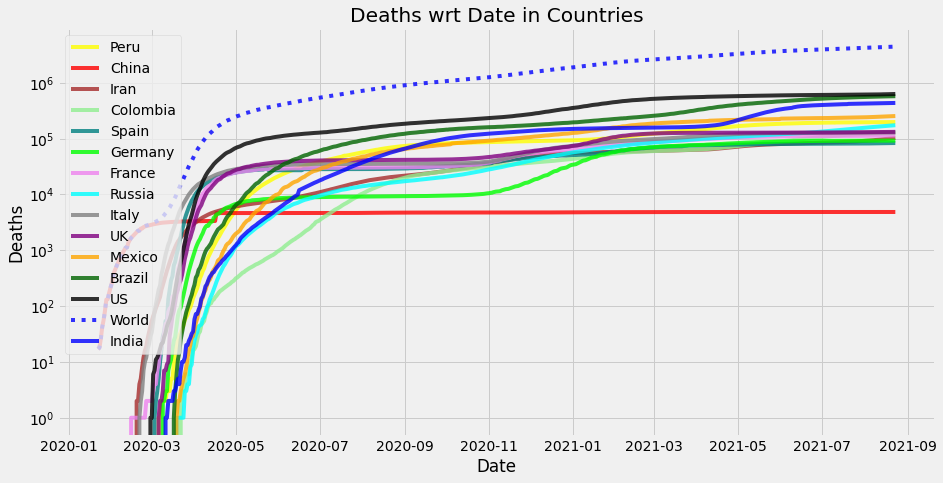

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-19,36571,696709,138472,36315,23169,36533,7240,20459,25389,8303,12445,3193,31266,38,1371
2021-08-20,34457,864032,319456,33887,21734,37128,7220,20402,23482,8966,12450,3416,28833,22,1396
2021-08-21,30948,532688,59521,28388,20307,31886,7466,20414,22637,6600,0,2965,24179,35,1173
2021-08-22,25072,446096,36692,14404,7658,32034,5922,19977,17300,5946,0,2640,36419,26,918
2021-08-23,25467,697803,229831,13103,6543,31856,4166,18875,7911,5592,23899,2698,38657,40,0


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-19,38725,614110,106973,34521,16373,29748,5468,21565,21403,3891,16431,7479,33896,68,1485
2021-08-20,38441,630771,121139,34479,16730,30240,5584,21487,21542,4229,16165,7208,33559,65,1479
2021-08-21,37941,624233,117031,34073,16969,30350,5710,21416,21615,4387,15088,6925,32933,63,1459
2021-08-22,37083,612357,111675,32762,16348,30462,5724,21320,21327,4491,14082,6639,33166,61,1423
2021-08-23,36309,618053,119552,31451,15694,30555,5620,21157,20433,4564,14736,6377,33532,59,1328


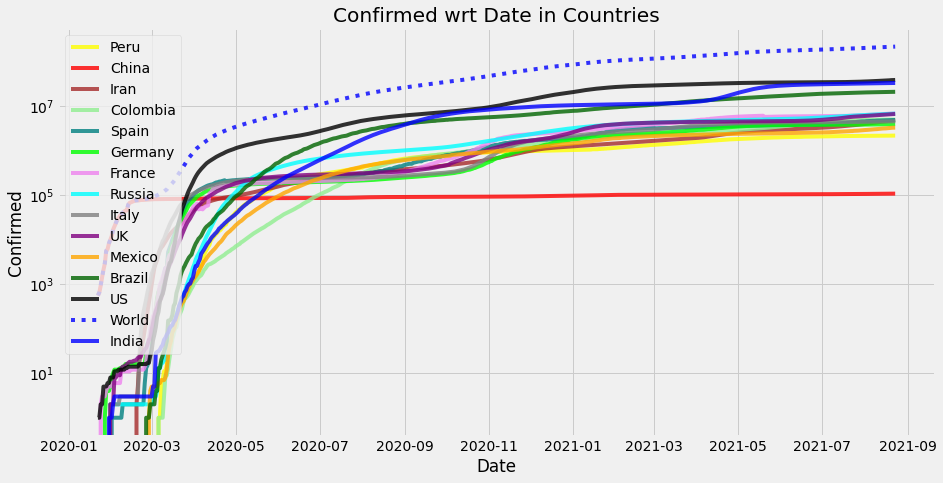

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-19,540,10615,908,979,836,114,55,768,137,14,121,120,564,0,57
2021-08-20,375,11633,2636,870,775,114,49,764,96,17,132,122,555,0,36
2021-08-21,403,8724,460,698,847,104,45,777,0,3,0,98,544,0,66
2021-08-22,389,7542,200,318,228,49,23,746,0,4,0,95,684,0,61
2021-08-23,354,9803,908,321,371,42,44,765,385,41,201,99,610,0,0


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-19,503.73,9814.27,709.80,888.32,608.05,95.25,36.65,779.37,84.20,16.23,85.42,155.39,529.44,-0.0,75.02
2021-08-20,487.63,10041.61,950.58,886.03,628.92,97.60,38.19,777.45,85.68,16.32,91.24,151.22,532.63,-0.0,70.14
2021-08-21,477.06,9876.91,889.26,862.53,656.18,98.40,39.04,777.39,74.97,14.66,79.84,144.57,534.05,-0.0,69.62
2021-08-22,466.05,9585.05,803.10,794.46,602.66,92.22,37.04,773.47,65.60,13.33,69.86,138.37,552.80,-0.0,68.54
2021-08-23,452.04,9612.29,816.21,735.28,573.70,85.94,37.91,772.41,105.52,16.79,86.25,133.45,559.95,-0.0,59.98


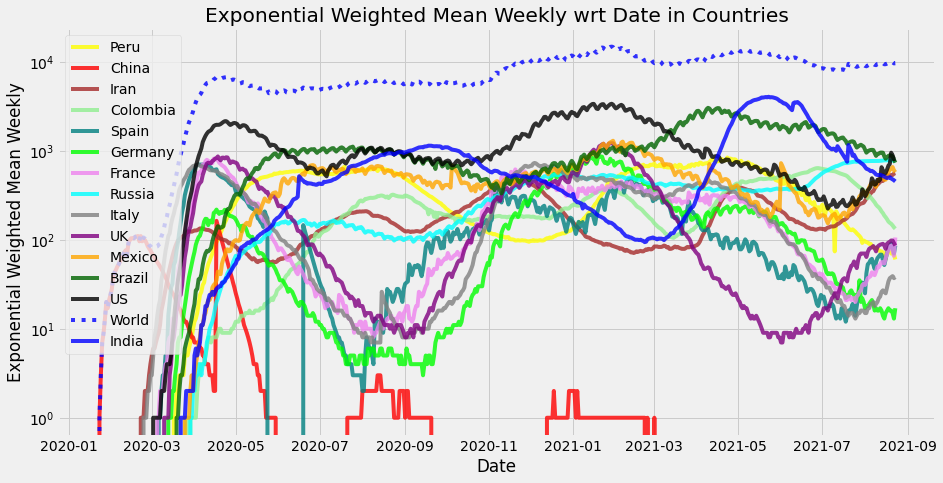

In [18]:
plotter(np.round(AVG), name)

### Stack Plots

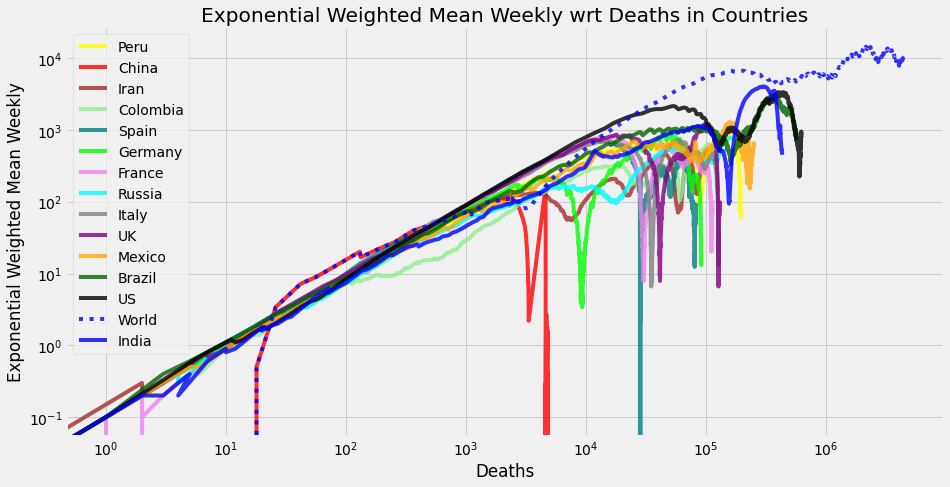

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

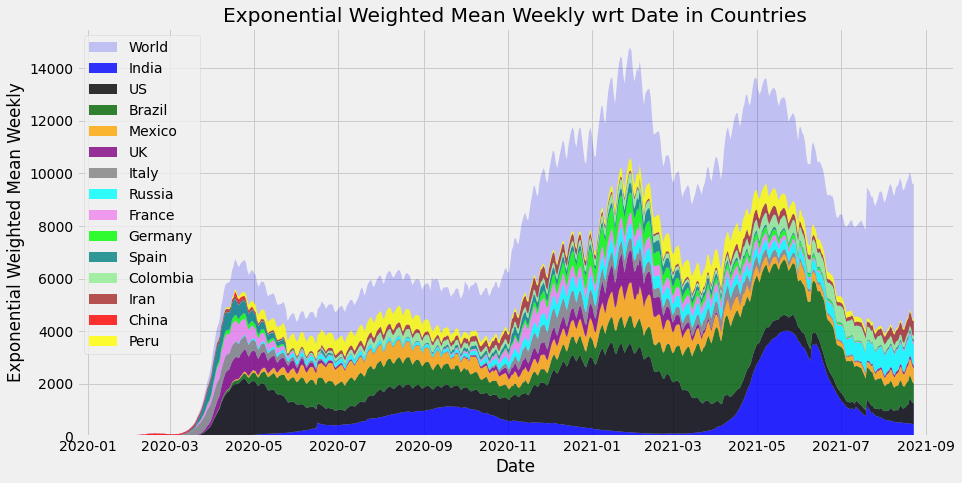

In [20]:
stackplotter(AVG, name)

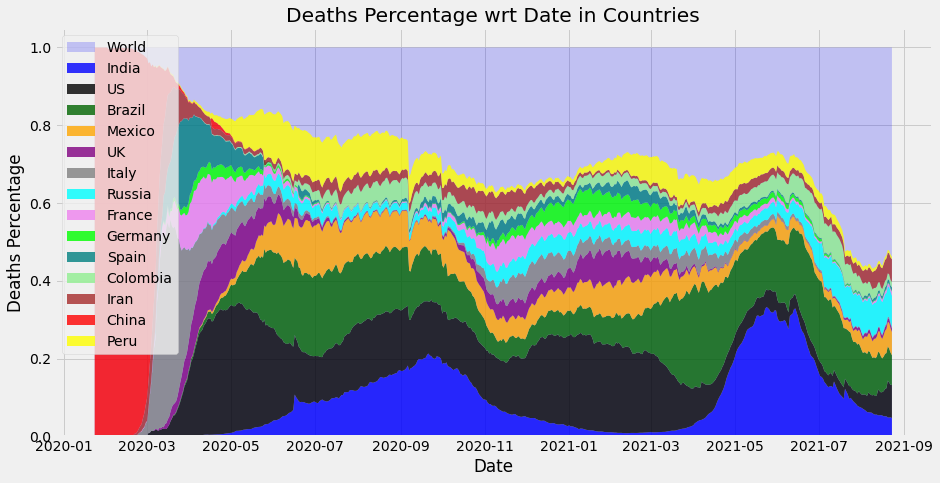

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

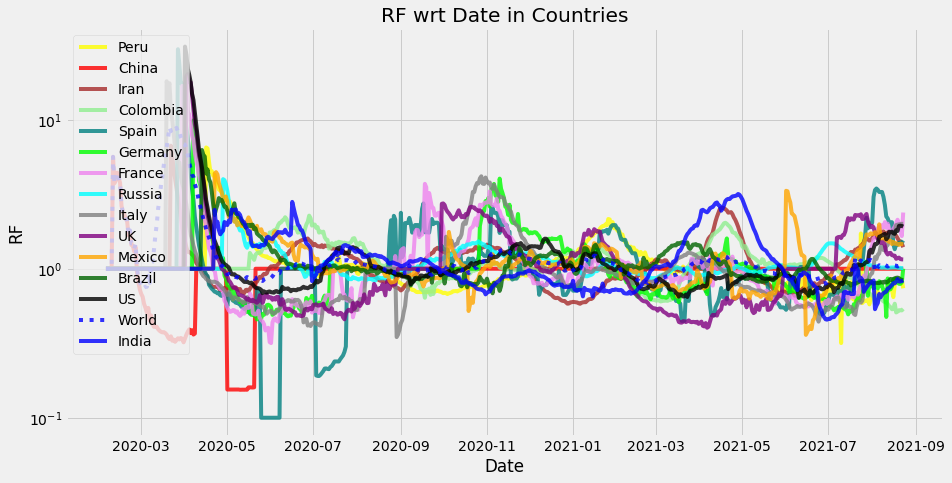

In [23]:
plotter(Reproductivity, 'RF')

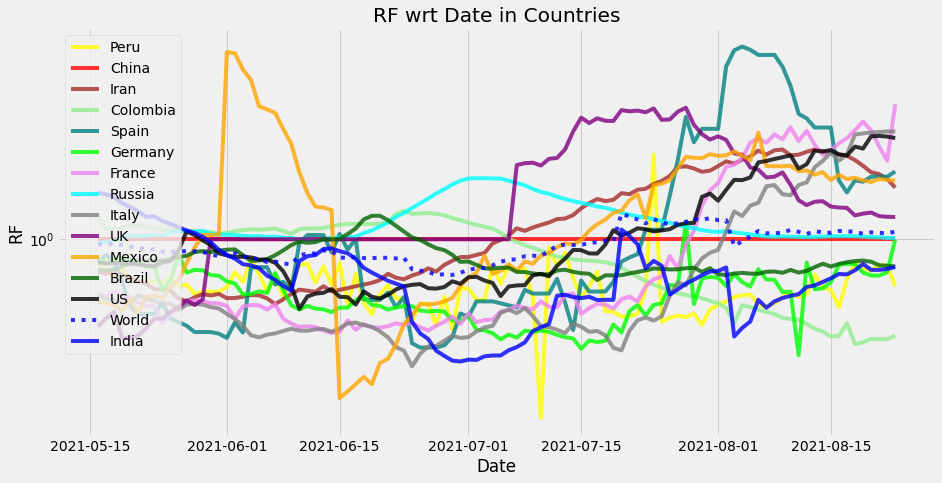

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

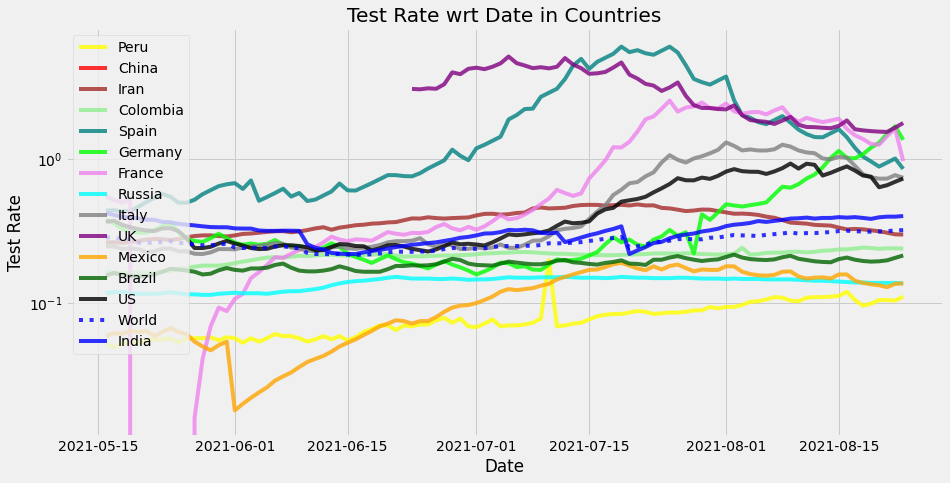

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

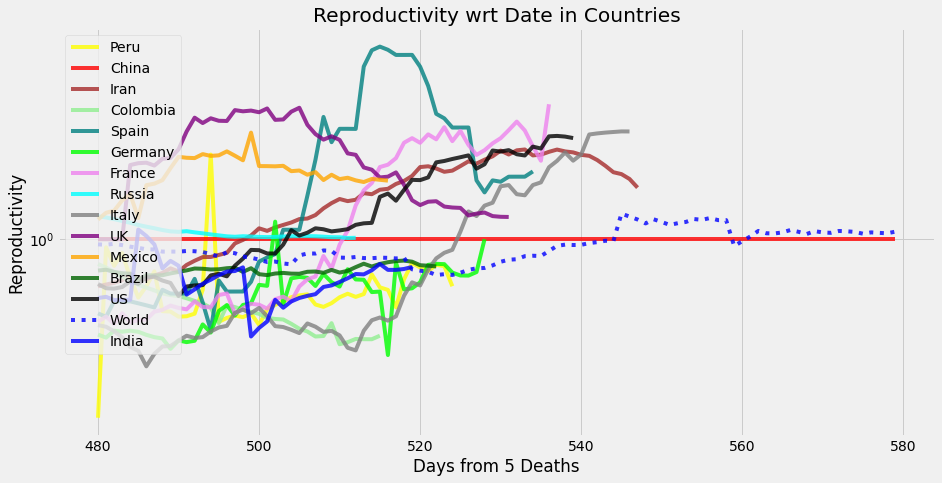

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

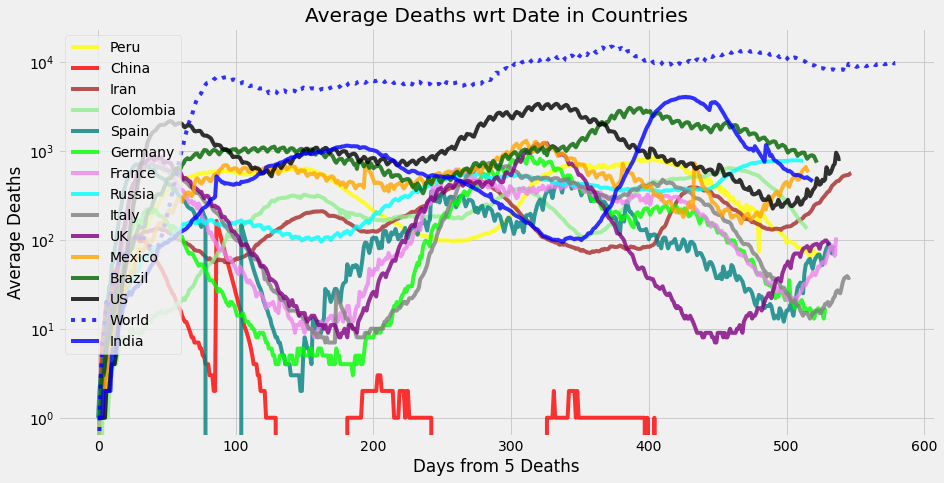

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

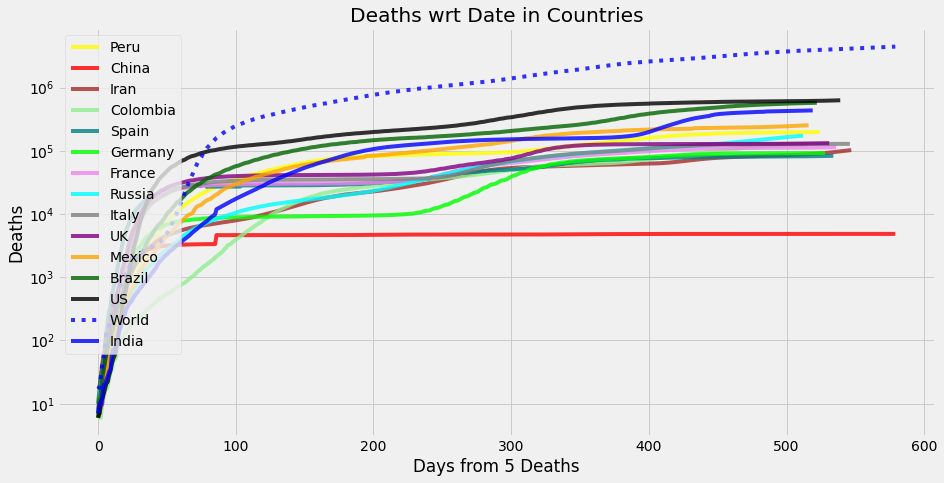

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4441321,9803,9972.71,9612.29,1.0503,212540697,0.321,618053,888.26
US,629411,908,1032.14,816.21,1.9184,37939641,0.732,119552,125.88
Brazil,574848,321,765.14,735.28,0.8399,20583994,0.214,31451,114.97
India,435110,354,433.00,452.04,0.8367,32474773,0.402,36309,87.02
Mexico,253526,371,696.29,573.70,1.4586,3231616,0.137,15694,50.71
Peru,197879,0,69.43,59.98,0.7392,2142153,0.111,1328,39.58
Russia,173768,765,769.14,772.41,1.0096,6672373,0.137,21157,34.75
UK,132000,42,100.57,85.94,1.1545,6555419,1.778,30555,26.40
Italy,128795,44,48.43,37.91,2.0016,4488779,0.741,5620,25.76


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4441321,9803,9972.71,9612.29,1.0503,212540697,0.321,618053,888.26
Indonesia,127214,842,1197.29,1287.09,0.8177,3989060,0.099,25526,25.44
US,629411,908,1032.14,816.21,1.9184,37939641,0.732,119552,125.88
Russia,173768,765,769.14,772.41,1.0096,6672373,0.137,21157,34.75
Brazil,574848,321,765.14,735.28,0.8399,20583994,0.214,31451,114.97
Mexico,253526,371,696.29,573.70,1.4586,3231616,0.137,15694,50.71
Iran,102648,610,595.00,559.95,1.3944,4715771,0.299,33532,20.53
India,435110,354,433.00,452.04,0.8367,32474773,0.402,36309,87.02
Vietnam,8666,389,360.71,343.30,1.5257,358456,0.127,8706,1.73


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  4441321


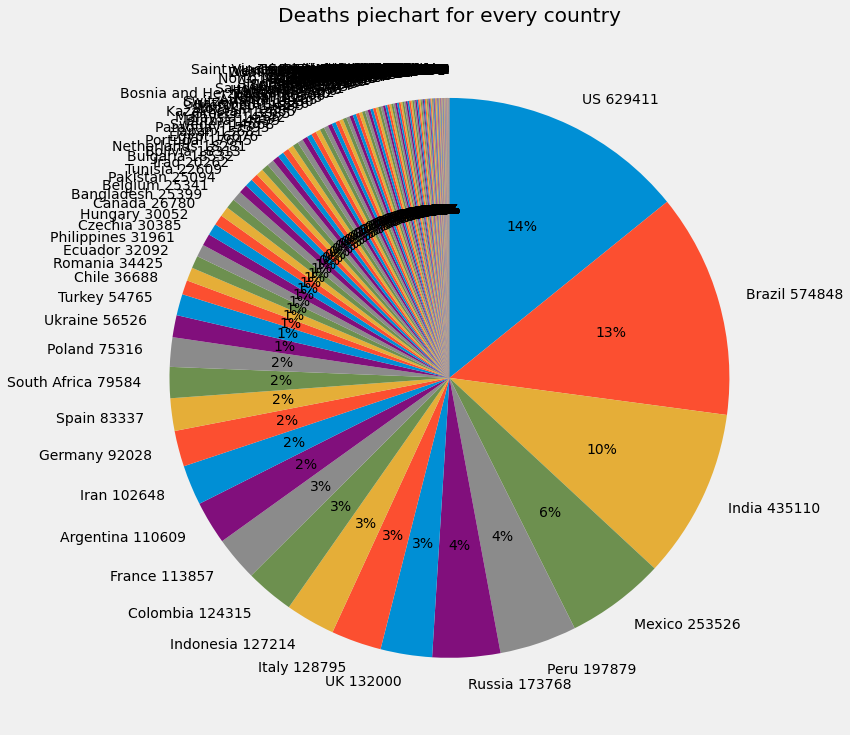

In [35]:
piechart('Deaths')

World total:  9972


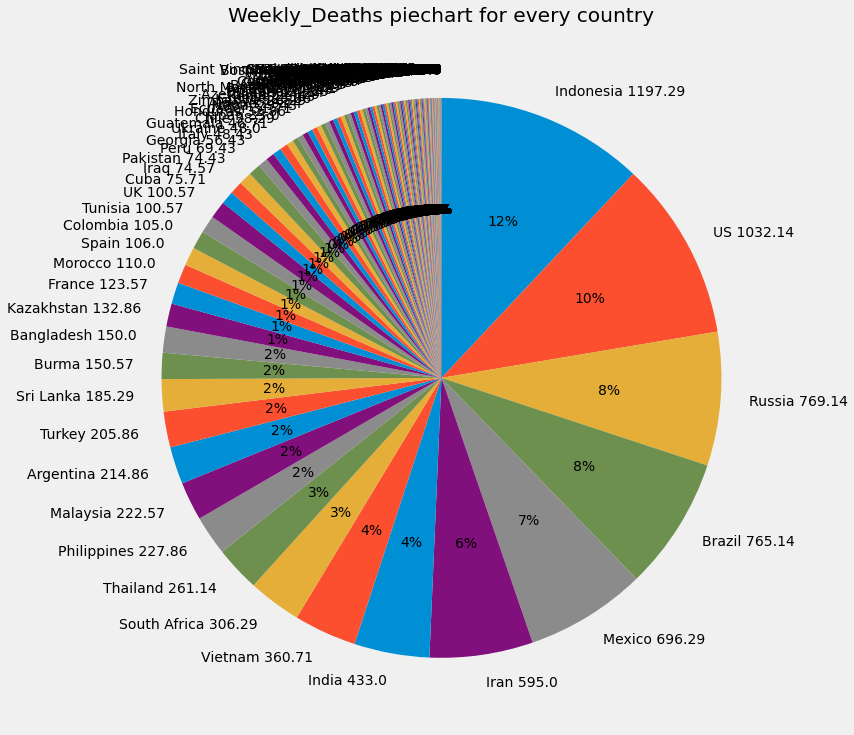

In [36]:
piechart('Weekly_Deaths')

World total:  9803


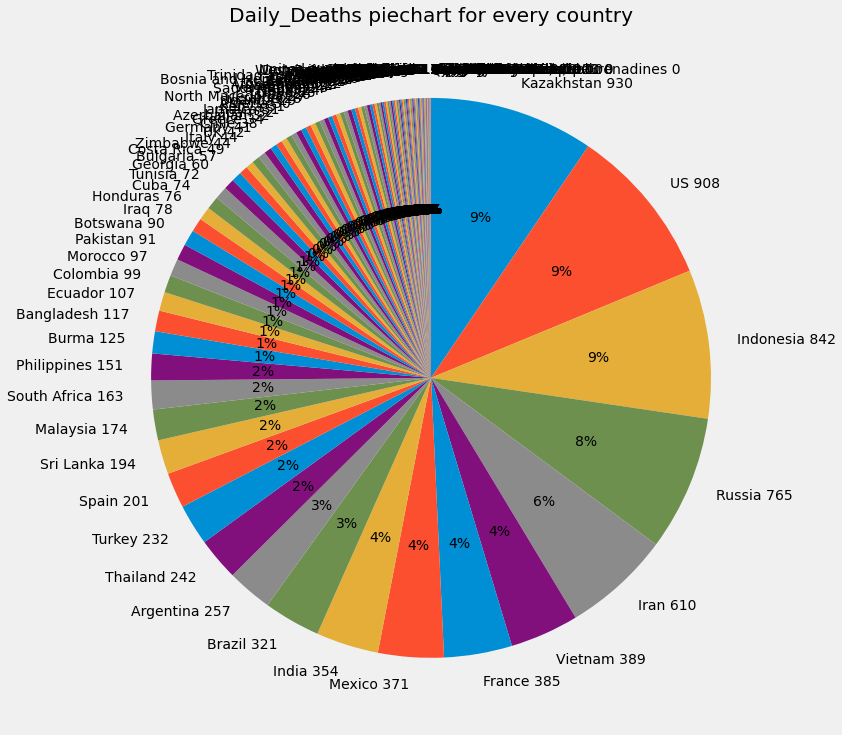

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-08-24


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

888264200.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master 56a0bdb] `date` update
 1 file changed, 1522 insertions(+), 2125 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (82%)


To https://github.com/Arrowheadahp/COVID-19.git
   60f1897..56a0bdb  master -> master
